## Final Project Submission


* Jessica Rodriguez
* Self Paced
* Scheduled project review date/time: 
* Instructor name: N/A


## Data Understanding and Preparation

In [14]:
# import necessary packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [15]:
# read in data from csv
df = pd.read_csv('data/kc_house_data.csv', index_col=0)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [16]:
# get statistics of df
round(df.describe(), 2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [17]:
# Identify datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [18]:
# Convert date sold column to datetime in case we want to work with later 
df['date']=pd.to_datetime(df['date'])

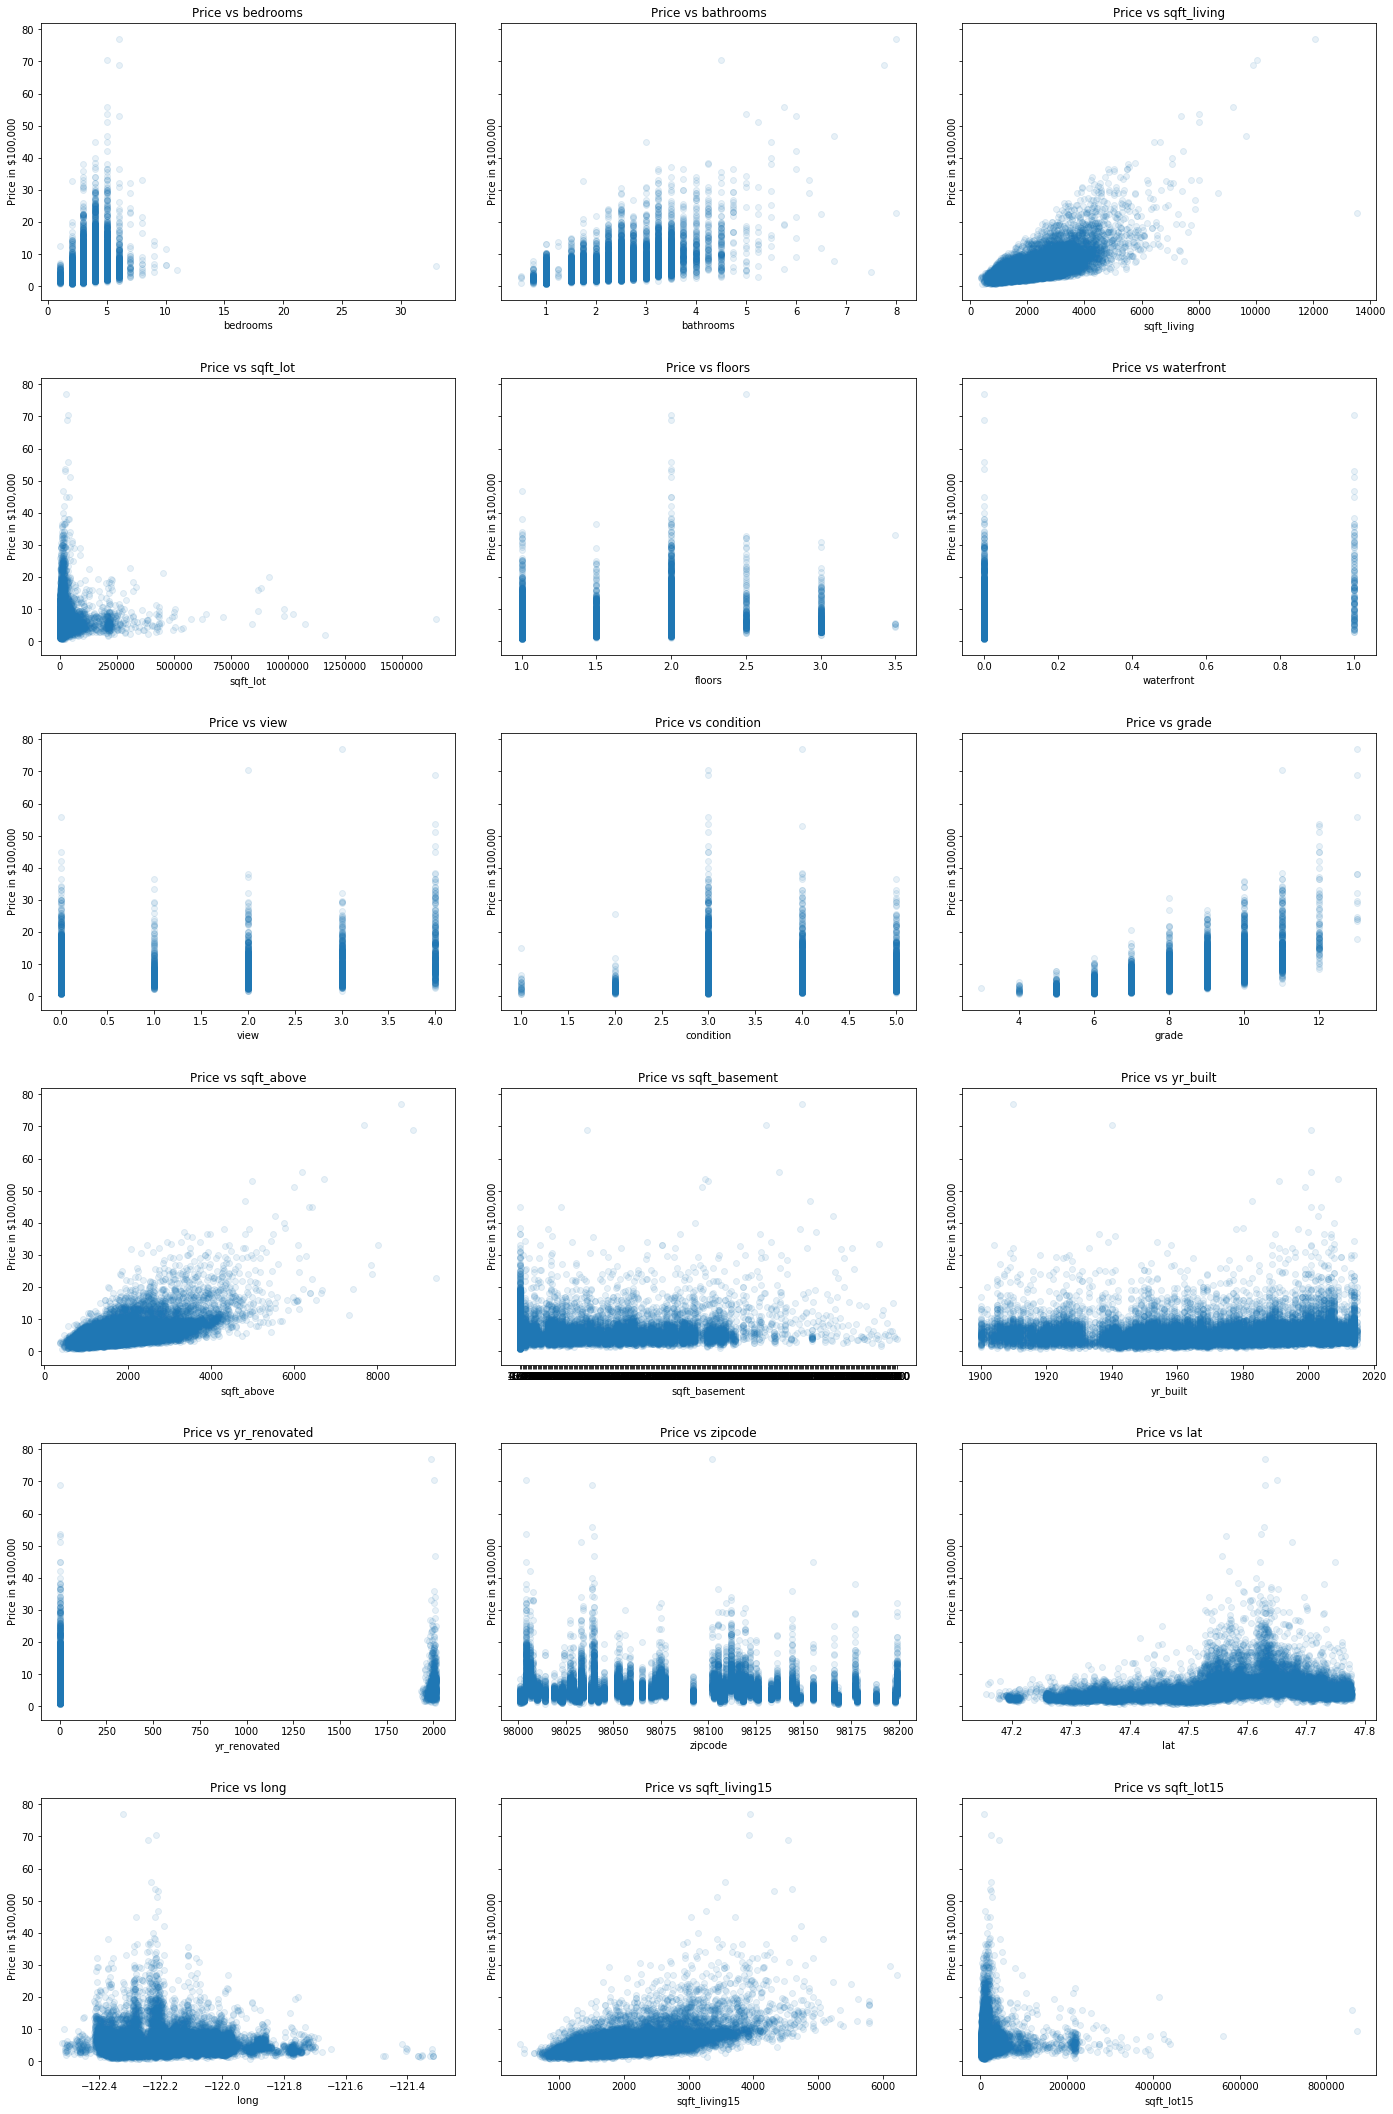

In [19]:
# Check linearity with all columns when compared to target variable
# Set price to $100,000s
fig, axes = plt.subplots(6, 3, figsize=(20,30), sharey=True)
for ax, column in zip(axes.flatten(), df.columns[2:]):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')
fig.tight_layout(pad=3.0)



Scatterplot observations:
1. Any data that compares price to a sqarefootage attribute has a clear linear relationship
2. The amount of bedrooms and bathrooms have a linear relationship with price
3. Houses with two floors sell for higher prices
4. Houses in good condition (3.0) sell for higher prices
5. Renovation year does not seem to have an effect on price
6. Certain zip codes have higher prices than others

/Users/jessicarodriguez/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


FileNotFoundError: [Errno 2] No such file or directory: './images/histo_eda.png'

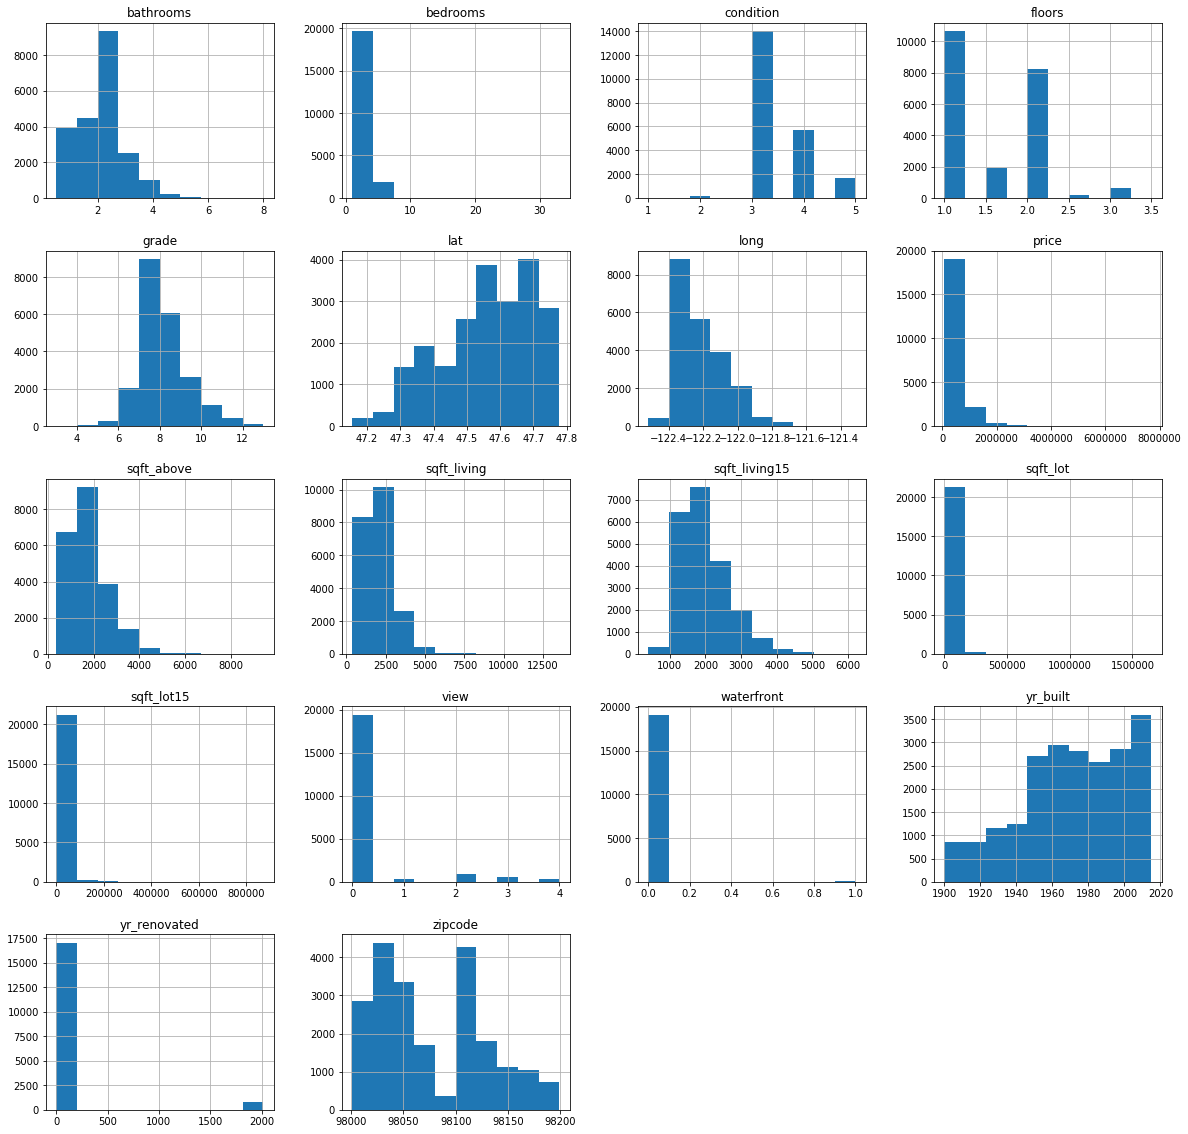

In [20]:
# Look at histogram distributions
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
df.hist(ax = ax);
plt.savefig('./images/histo_eda.png')

Histogram Observations:
1. Most houses have between 1 - 4 bathrooms
2. Most houses have 4 bedrooms or less
3. Most houses have 1 floor
4. Most houses have a condition of 3.0
5. Price has a positive skewdness across data
6. Some zipcodes have more houses than others
7. Prices on houses significantly increased after the 1940s(?)

In [21]:
# look at value_counts to identfy any outliers. Focus on bedrooms and bathrooms.
for col in df.columns:
    print(col, df[col].value_counts())

date 2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-07-27      1
2015-03-08      1
2014-11-02      1
2015-05-15      1
2015-05-24      1
Name: date, Length: 372, dtype: int64
price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
bedrooms 3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50  

Outlier Observations:
1. There is 1 11-bedroom and 1 33-bedroom house
2. There are 2 7-bathroom houses and 4 0 bathroom houses


In [22]:
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [23]:
# Remove outliers from bedroom column
mean_bed_no_outliers = df.loc[(df['bedrooms'] != 33) | (df['bedrooms'] != 0), 'bedrooms'].mean()
mean_bed_no_outliers

3.3731999814789093

In [24]:
df['bedrooms'] = np.where((df['bedrooms'] == 33) | (df['bedrooms'] == 0), round(mean_bed_no_outliers), df['bedrooms'])

In [25]:
df['bathrooms'].describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [26]:
# Remove outliers from bathroom column
mean_bath_no_outliers = df.loc[(df['bathrooms'] != 0) | (df['bathrooms'] < 7.0), 'bathrooms'].mean()
mean_bath_no_outliers

2.1158262721674306

In [27]:
df['bathrooms'] = np.where((df['bathrooms'] == 0) | (df['bathrooms'] >= 6.0), round(mean_bath_no_outliers), df['bathrooms'])

### Multicolinearity Check:

In [28]:
# generate copy of df without target variable (price), date and lat/lon to perform multicolinearity check
df_pred = df.drop(['date', 'price', 'lat', 'long'], axis=1)
df_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,
7129300520,3.0,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
6414100192,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
5631500400,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,2720,8062
2487200875,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
1954400510,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503


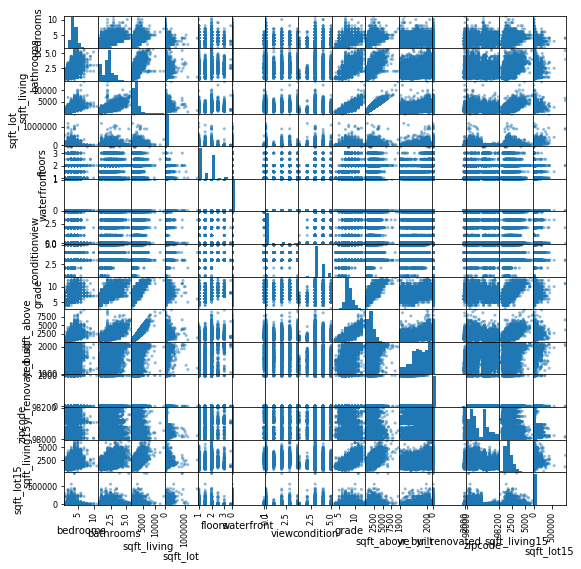

In [29]:
pd.plotting.scatter_matrix(df_pred,figsize  = [9, 9]);
plt.show()

In [30]:
# Check for correlation amoung variables, with .75 as the cutoff
abs(df_pred.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,False,False,True,True,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False


FileNotFoundError: [Errno 2] No such file or directory: './images/multicolin_heatmap.png'

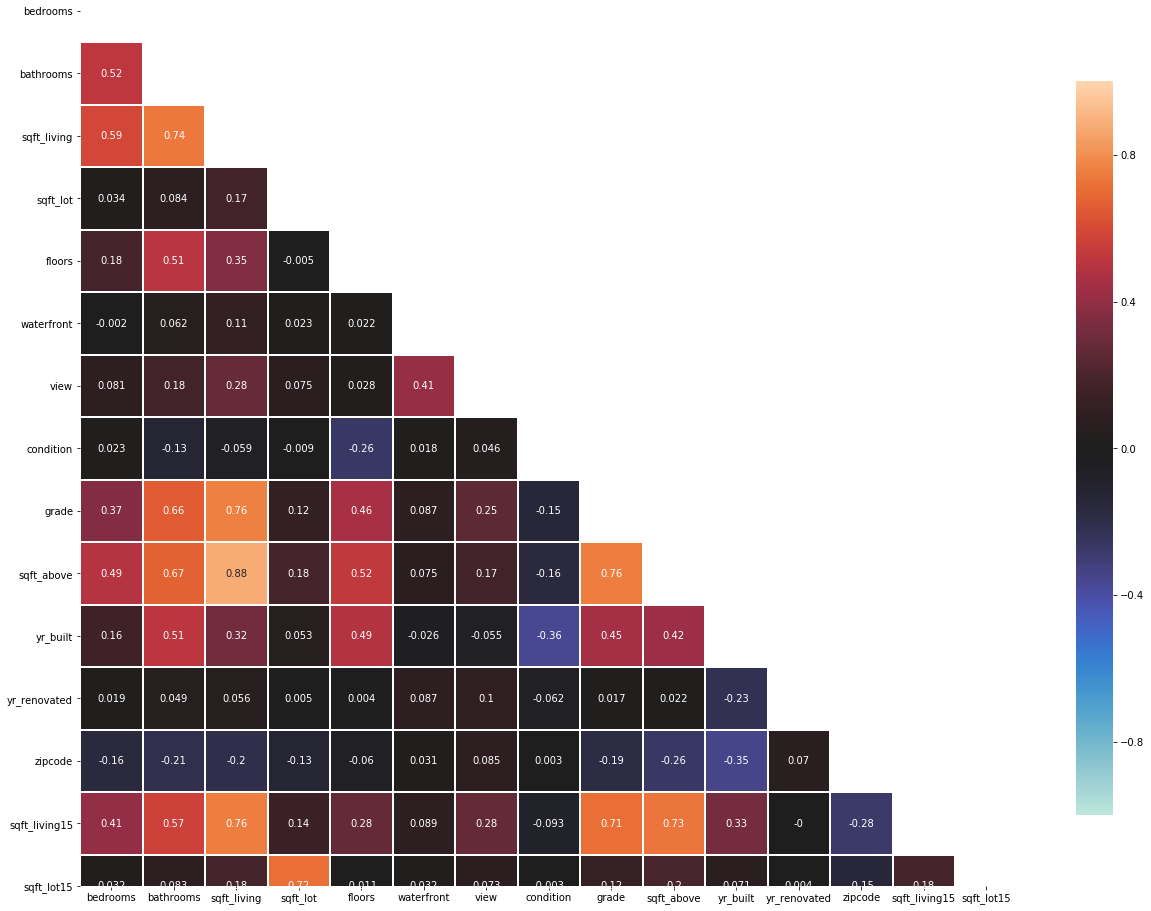

In [31]:
# Use seaborn heatmap to check for multicolinearity
corr = round(df_pred.corr(), 3)

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(21, 18))

ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, linewidths=1, cbar_kws={"shrink": .75}, annot=True)

plt.savefig('./images/multicolin_heatmap.png')
plt.show();

Scatterplot and Heatmap Observations:
1. sqft_above, sqft_living, and sqft_living15 are highly correlated

### Prepare Categorical Data and Select Best Predictors of Price

In [ ]:
# Identify categortical data (data that can be divided into groups, or categories)
# convert to category type
categorical = ['bedrooms','bathrooms','floors','grade','zipcode']

for column in df[categorical]:
    df[categorical] = df[categorical].astype('category')   

In [ ]:
# Examine categorical data with boxplots to determine best predictors of price
# Bedrooms
var = "bedrooms"
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(14,6))
fig = sns.boxplot(x=var, y='price', data=data)

The number of bedrooms (up to 7) is highly correlated with price. Will use this predictor.

In [ ]:
# bathrooms
var = 'bathrooms'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(14,6))
fig = sns.boxplot(x=var, y='price', data=data)

The number of bathrooms is highly correlated with price. Will use this predictor.

In [ ]:
# condition
var = 'condition'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price', data=data)

Prices increase significantly after condition hits 3.

In [ ]:
# Grade
var = 'grade'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price', data=data)

Grade is highly correlated with price. Will use this predictor.

In [ ]:
var = 'zipcode'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(18,8))
fig = sns.boxplot(x=var, y='price', data=data)

Location is highly correlated with price. 

### Statistical Test: Determine between variance between zipcodes is significant with ANOVA

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
formula = 'price ~ C(zipcode)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

There is a p-value of 0.0. This indicates a significant difference between zipcodes.

### Create Dummy Variables for Categorical Data:
1. Bedrooms
2. Bathrooms
3. Grade

In [ ]:
# create dummy variables
category_list = ['bedrooms', 'bathrooms', 'grade']
dummies = pd.get_dummies(df[category_list], drop_first=True)
dummies


In [ ]:
# Remove categorical data
df_preprocessed = df.drop(category_list, axis=1)
df_preprocessed

## Modeling

### Prepare Continuous Data for Modeling

In [ ]:
df.info()

In [ ]:
# Select and visualize continuous data (data that can take any value)
continuous = ['sqft_living','sqft_lot','sqft_above','yr_built','sqft_living15','sqft_lot15']

for column in continuous:
    sns.jointplot(x=column, y="price", data=df, kind='reg', label=column,joint_kws={'line_kws':{'color':'orange'}})
    plt.legend()
    plt.show()

In [ ]:
# find median of year house was built
yr_built_median = df_preprocessed['yr_built'].median()
yr_built_median

In [ ]:
# find median of sqft_lot
sqft_lot_median = df_preprocessed['yr_built'].median()

Modeling Observations:
1. sqft_living, sqft_lot, sqft_lot15 all have a positive linear relationship with our target variable (price).
2. There is a slight slope between price and yr_built, indicating little impact between the variables. However, most homes built between 1900 - 2020 were priced up to $200,000.
3. Median for yr_built is 1975
4. Since continuous predictors have high multicolinearity (as addressed previously) I will use only sqft_living

In [ ]:
# create basement boolean column
df_preprocessed['basement'] = np.where((df_preprocessed['sqft_basement'] != 0), 1, 0)

### Train - Test Split

In [ ]:
# Since "price" is our prediction target, we need to seperate the data into x and y values
features = ['sqft_living', 'sqft_lot', 'floors', 'yr_built']

x = df_preprocessed[features]

y = df_preprocessed['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))    

In [ ]:
# Confirm that the rows are the same in both the train and test sets.
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

In [ ]:
# See if there are any null values in our data
X_train.isna().sum()

In [ ]:
# Fit the model to the training data

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
from sklearn import metrics

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_test = lm.predict(X_train)


rms = np.sqrt(metrics.mean_squared_error(y_train, y_train_test))

print("The root mean squared error is", rms)

The model has ~$251,000 margin of error.

In [ ]:
absolute = np.sqrt(metrics.mean_absolute_error(y_train, y_train_test))
print("The mean absolute error is", absolute)

The model is $406 off on average with each prediction.

In [ ]:
# Display the coefficients
lm.coef_
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
coefficients

If the target variable varies by 1 unit ($), the respective feature is expected to vary by the level specified in the coefficient.

### Use Model to Predict the Training and Testing Data

In [ ]:
# use model to predict on test set
test_predict = lm.predict(X_test)

In [ ]:
# Evaluate the training and test predictions using RMSE
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, test_preds))
print(test_rmse )

Test set performed better then train split, therefore model is not overfit.

In [ ]:
sns.residplot(y_test, test_predict, lowess=True, color='g');

### Fit Final Model to Dataset

In [ ]:
# select model features used for entire dataset 
df_features_full_set = df_preprocessed[features]

#instantiate a linear regression object
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm.fit(df_features_full_set, target)

### Use Pickle to Save Final Model

In [ ]:
import pickle

pickle_out = open('model.pickle', 'wb')
pickle.dump(lm_final, pickle_out)
pickle_out.close()